# Data-driven Mapping

*Data-driven mapping* refers to the process of using data values to determine the symbology of mapped features. Color, shape, and size are the three most common symbology types used in data-driven mapping.
Data-driven maps are often refered to as thematic maps.

There are two primary types of maps used to convey data values:

- **Choropleth maps**: set the color of areas (polygons) by data value.
- **Point symbol maps**: set the color or size of points by data value.

We will discuss both of these types of maps in more detail in this lesson.

<!---
- Expected time to complete
    - Lecture + Questions: 30 minutes
    - Exercises: 15 minutes
-->

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

## Choropleth Maps

Choropleth maps are the most common type of thematic map.

Let's take a look at how we can use a GeoDataFrame to make a choropleth map. We'll start by reloading our counties dataset from Day 1.

In [2]:
counties = gpd.read_file('../data/california_counties/CaliforniaCounties.shp')

In [3]:
counties.head()

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,...,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,...,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,NaN,NaN,NaN,NaN,"POLYGON ((193446.035 -244342.585, 194033.795 -..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,...,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,NaN,NaN,NaN,NaN,"POLYGON ((12524.028 -179431.328, 12358.142 -17..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,...,72.31,1329.46,06106,NaN,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-240632.150 93056.104, -240669..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,...,120.92,4720.42,06086,NaN,0,NaN,NaN,NaN,NaN,"POLYGON ((-45364.032 352060.633, -45248.844 35..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,...,187.94,4087.19,06073,"San Bernardino,Kern",2874841,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((173874.519 -471855.293, 173852..."


In [4]:
counties.columns

Index(['FID_', 'NAME', 'STATE_NAME', 'POP2010', 'POP10_SQMI', 'POP2012',
       'POP12_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI',
       'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5',
       'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
       'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS',
       'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C',
       'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS',
       'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS07', 'AVG_SIZE07',
       'CROP_ACR07', 'AVG_SALE07', 'SQMI', 'CountyFIPS', 'NEIGHBORS',
       'PopNeigh', 'NEIGHBOR_1', 'PopNeigh_1', 'NEIGHBOR_2', 'PopNeigh_2',
       'geometry'],
      dtype='object')

Here's a plain map of our polygons.

<Axes: >

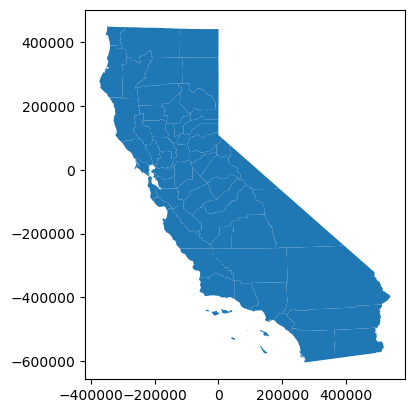

In [5]:
counties.plot()

Now, for comparison, let's create a choropleth map by setting the color of the county based on the values in the population per square mile (`POP12_SQMI`) column.

<Axes: >

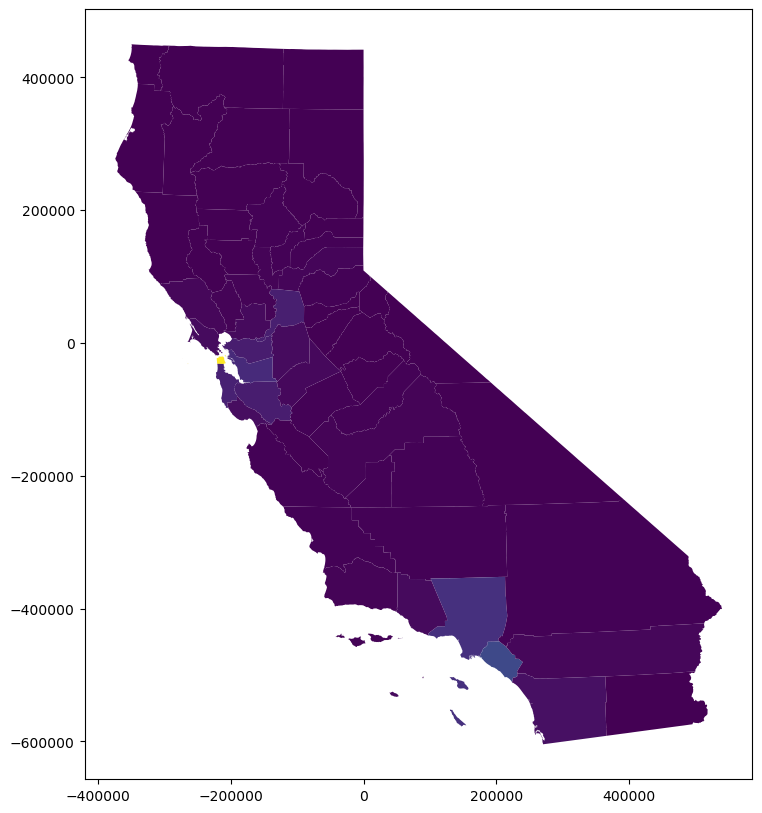

In [6]:
counties.plot(column='POP12_SQMI', figsize=(10, 10))

That's really the heart of it. To set the color of the features based on the values in a column, we set the `column` argument to the column name in the GeoDataFrame.

> **Protip:** You can quickly right-click on the plot and save to a file or open in a new browser window.

By default, map colors are linearly scaled to data values. This is called a `proportional color map`. The great thing about `proportional color maps` is that you can visualize the full range of data values.

We can also add a legend, and even tweak its display.

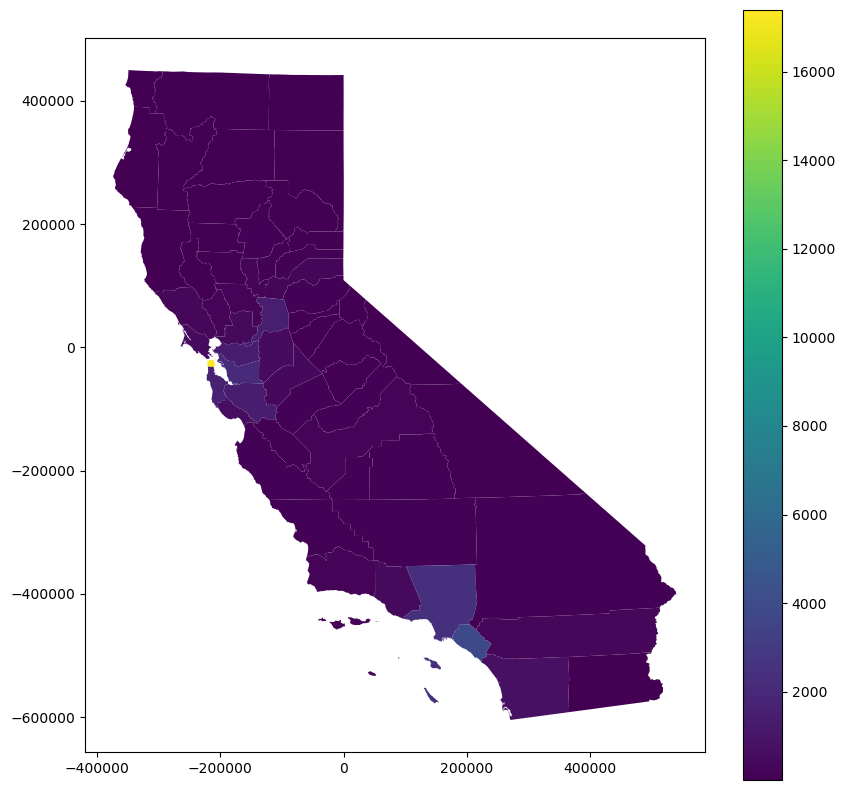

In [7]:
counties.plot(column='POP12_SQMI', figsize=(10, 10), legend=True)
plt.show()

Let's customize this even further!

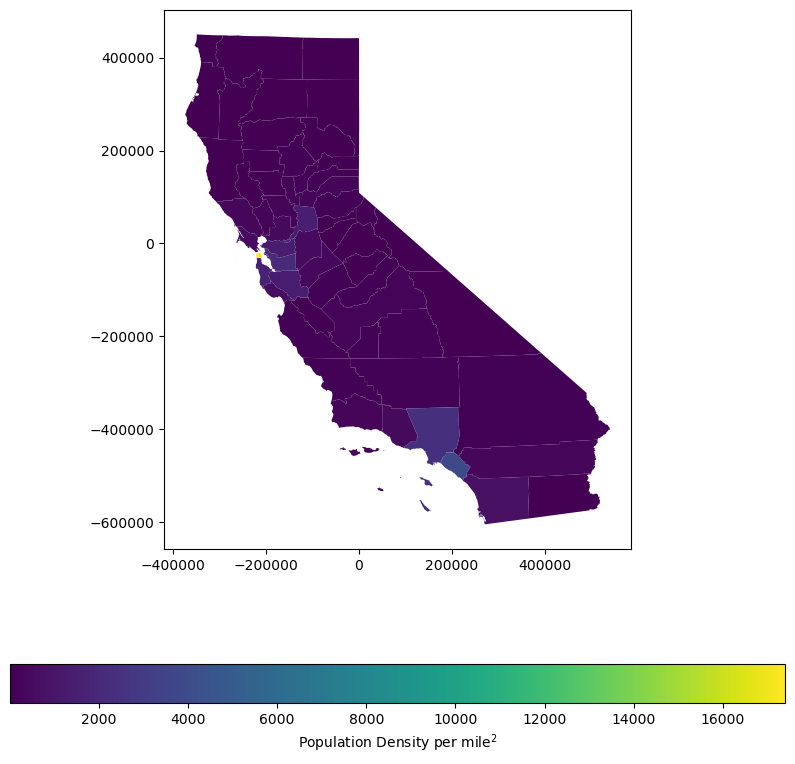

In [8]:
counties.plot(column='POP12_SQMI',
              figsize=(10, 10),
              legend=True,
              legend_kwds={'label': "Population Density per mile$^2$",
                           'orientation': "horizontal"})
plt.show()

---

### Challenge 1: Plotting Different Columns

Why are we plotting `POP12_SQMI` instead of `POP2012`? What do each of the two columns tell us?

Try plotting `POP2012`, instead. What does this look like?

---

<Axes: >

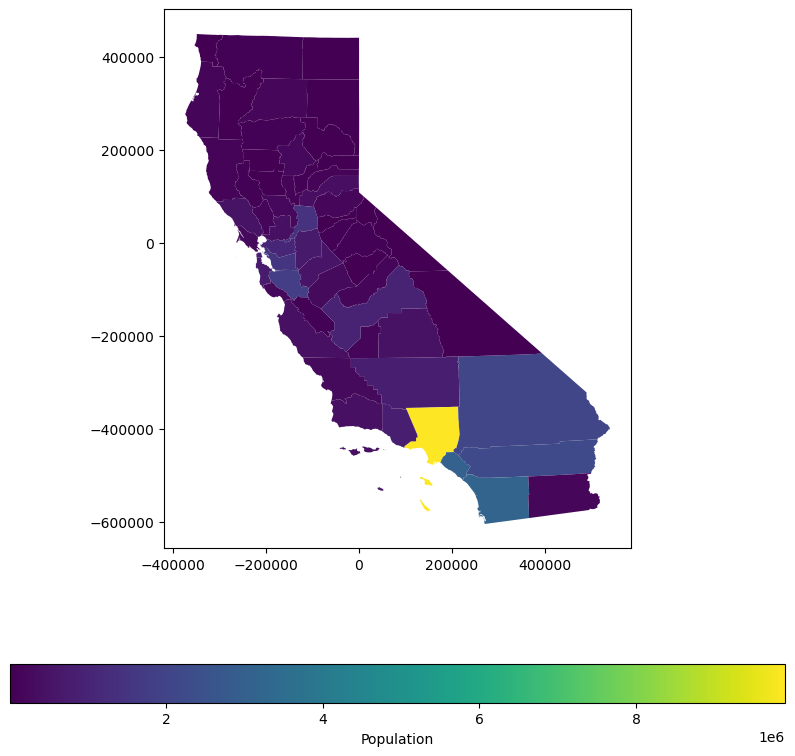

In [10]:
# YOUR CODE HERE
# Plot POP2012
counties.plot(column='POP2012',
              figsize=(10, 10),
              legend=True,
              legend_kwds={'label': "Population",
                           'orientation': "horizontal"})

### Note: Types of Color Maps

There are a few different types of color maps (or color palettes), each of which has a different purpose:

- *diverging*: a "diverging" set of colors are used so emphasize mid-range values as well as extremes.
- *sequential*: usually with a single color hue to emphasize changes in magnitude, where darker colors typically mean higher values
- *qualitative*: a diverse set of colors to identify categories and avoid implying quantitative significance.

<img src="http://www.gnuplotting.org/figs/colorbrewer.png"></img>

> **Pro-tip**: You can actually see all your color map options if you misspell what you put in `cmap` and try to run-in. Try it out!

> **Pro-tip**: Sites like [ColorBrewer](https://colorbrewer2.org/#type=sequential&scheme=Blues&n=3) let you play around with different types of color maps. If you want to create your own, [The Python Graph Gallery](https://python-graph-gallery.com/python-colors/) is a way to see what your Python color options are.

## Things to Keep in Mind When Creating Visualization

### Types of Choropleth Data

There are several types of quantitative data variables that can be used to create a choropleth map. Let's consider these in terms of the ACS data.

- **Count**: counts, aggregated by feature
    - *e.g. population within a census tract*
- **Density**: count, aggregated by feature, normalized by feature area
    - *e.g. population per square mile within a census tract*
- **Proportions / Percentages**: value in a specific category divided by total value across in all categories
    - *e.g. proportion of the tract population that is white compared to the total tract population*
- **Rates / Ratios**: value in one category divided by value in another category
    - *e.g. homeowner-to-renter ratio would be calculated as the number of homeowners (c_owners/ c_renters)*
    
### Interpretability of Plotted Data

The goal of a choropleth map is to use color to visualize the spatial distribution of a quantitative variable.

Brighter or richer colors are typically used to signify higher values.

A big problem with choropleth maps is that our eyes are drawn to the color of larger areas, even if the values being mapped in one or more smaller areas are more important.

We see just this sort of problem in our population-density map. 

***Why does our map not look that interesting?*** Take a look at the histogram below, then consider the following question.

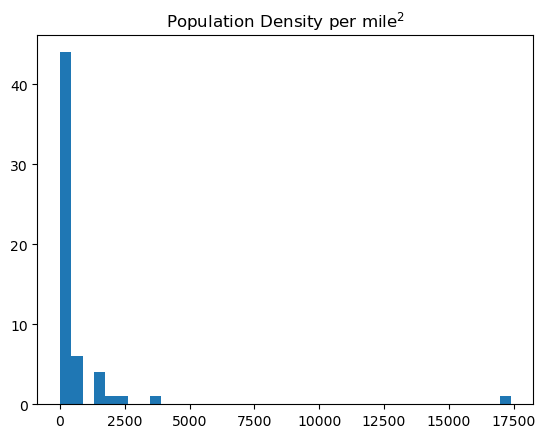

In [11]:
plt.hist(counties['POP12_SQMI'], bins=40)
plt.title('Population Density per mile$^2$')
plt.show()

What county does that outlier represent? What problem does that pose?

## Classification Schemes

Let's try to make our map more interpretable!

The common alternative to a proportionial color map is to use a **classification scheme** to create a **graduated color map**. This is the standard way to create a **choropleth map**.

A **classification scheme** is a method for binning continuous data values into 4-7 classes (the default is 5) and map those classes to a color palette. 

The commonly used classifications schemes include:

- **Equal intervals**
    - Equal-size data ranges (e.g., values within 0-10, 10-20, 20-30, etc.).
    - <u>Pros</u>:
        - Best for data spread across entire range of values.
        - Easily understood by map readers.
    - <u>Cons</u>:
        - Avoid if you have highly skewed data or a few big outliers.
 
- **Quantiles**
    - Equal number of observations in each bin
    - <u>Pros</u>:
        - Looks nice, because it best spreads colors across full set of data values.
        - Thus, it's often the default scheme for mapping software.
    - <u>Cons</u>:
        - Bins ranges based on the number of observations, not on the data values.
        - Thus, different classes can have very similar or very different values.
 
- **Natural breaks**
    - Minimizes within-class variance and maximize between-class differences.
    - Typical method is `'fisher-jenks'`.
    - <u>Pros</u>:
        - Great for exploratory data analysis, because it can identify natural groupings.
    - <u>Cons</u>:
        - Class breaks are best fit to one dataset, so the same bins can't always be used for multiple years.
 
- **Manual** 
    - Classifications are user-defined.
    - <u>Pros</u>: 
        - Especially useful if you want to slightly change the breaks produced by another scheme.
        - Can be used as a fixed set of breaks to compare data over time.
    - <u>Cons</u>:
        - More work involved.

### Classification Schemes and GeoDataFrames

Classification schemes can be implemented using the geodataframe `plot` method by setting a value for the **scheme** argument. This requires the [pysal](https://pysal.org/) and [mapclassify](https://pysal.org/mapclassify) libraries to be installed in your Python environment. 

Here is a list of the `classification schemes` names that we will use:

- `equalinterval`
- `quantiles`
- `fisherjenks`
- `naturalbreaks`
- `userdefined`.

For more information about these classification schemes, see the [pysal mapclassifiers web page](https://pysal.org/mapclassify/api.html) or check out the help docs.

Let's redo the last map using the `quantile` classification scheme.

In [14]:
# Install mapclassify
%pip install -U mapclassify


Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Population Density per Square Mile')

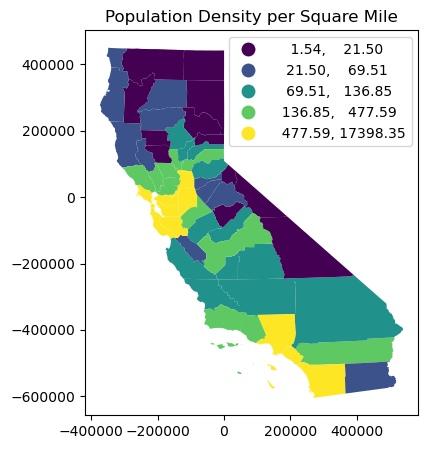

In [15]:
# Plot population density
fig, ax = plt.subplots(figsize=(10, 5)) 
counties.plot(column='POP12_SQMI', 
              scheme="quantiles",
              legend=True,
              ax=ax)
ax.set_title("Population Density per Square Mile")

What is different about the code? About the output map?

### User Defined Classification Schemes

You may get pretty close to your final map without being completely satisfied. In this case, you can manually define a classification scheme.

Let's customize our map with a `user-defined` classification scheme where we manually set the breaks for the bins using the `classification_kwds` argument.

Text(0.5, 1.0, 'Population Density per Square Mile')

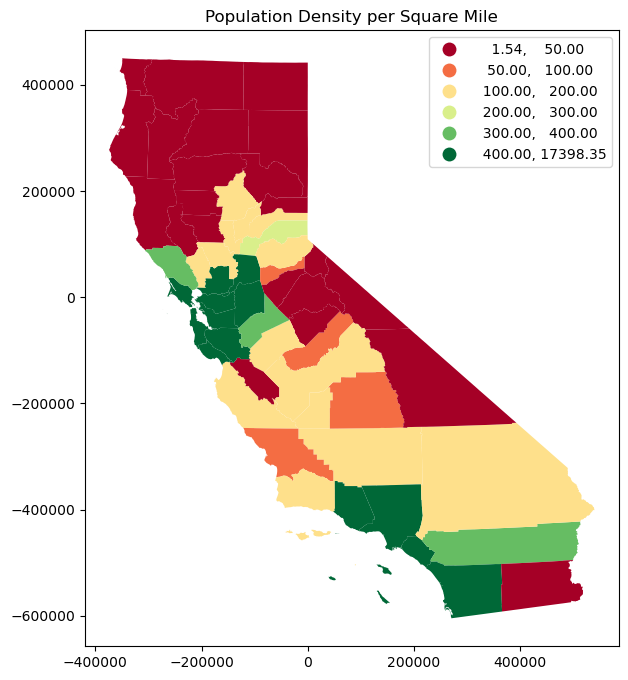

In [16]:
fig, ax = plt.subplots(figsize=(14, 8)) 
counties.plot(column='POP12_SQMI',
              legend=True, 
              cmap="RdYlGn", 
              scheme='user_defined', 
              classification_kwds={'bins': [50, 100, 200, 300, 400]},
              ax=ax)
ax.set_title("Population Density per Square Mile")

Since we are customizing our plot, we can also edit our legend to specify and format the text so that it's easier to read.

- We'll use `legend_labels_list` to customize the labels for group in the legend.

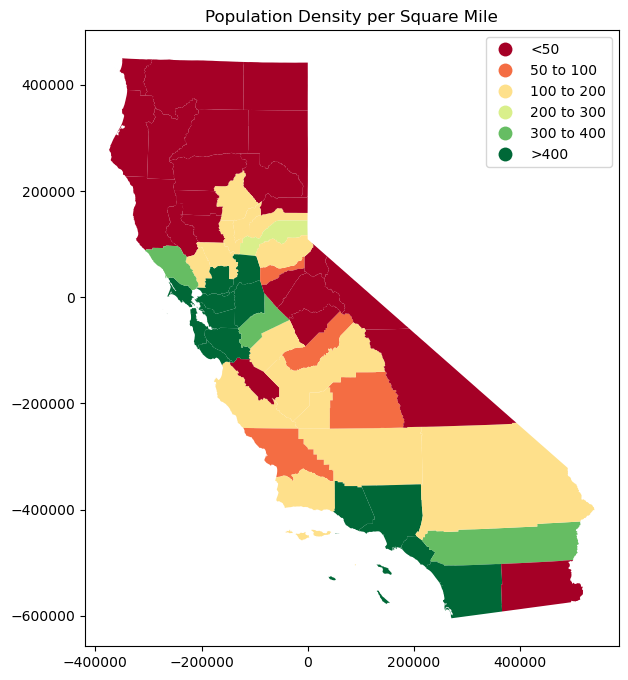

In [17]:
fig, ax = plt.subplots(figsize=(14, 8)) 
counties.plot(column='POP12_SQMI',
              legend=True, 
              cmap="RdYlGn", 
              scheme='user_defined', 
              classification_kwds={'bins': [50, 100, 200, 300, 400]},
              ax=ax)
ax.set_title("Population Density per Square Mile")

# Create the labels for the legend
legend_labels_list = ['<50',
                      '50 to 100',
                      '100 to 200',
                      '200 to 300',
                      '300 to 400',
                      '>400']

# Apply the labels to the plot
for idx, label in enumerate(ax.get_legend().get_texts()):
    label.set_text(legend_labels_list[idx])

### Plotting a Ratio

If we look at the columns in our dataset, we see we have a number of variables from which we can calculate proportions, rates, etc.

Let's try that out:

In [18]:
counties.head()

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,...,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,...,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,NaN,NaN,NaN,NaN,"POLYGON ((193446.035 -244342.585, 194033.795 -..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,...,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,NaN,NaN,NaN,NaN,"POLYGON ((12524.028 -179431.328, 12358.142 -17..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,...,72.31,1329.46,06106,NaN,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-240632.150 93056.104, -240669..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,...,120.92,4720.42,06086,NaN,0,NaN,NaN,NaN,NaN,"POLYGON ((-45364.032 352060.633, -45248.844 35..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,...,187.94,4087.19,06073,"San Bernardino,Kern",2874841,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((173874.519 -471855.293, 173852..."


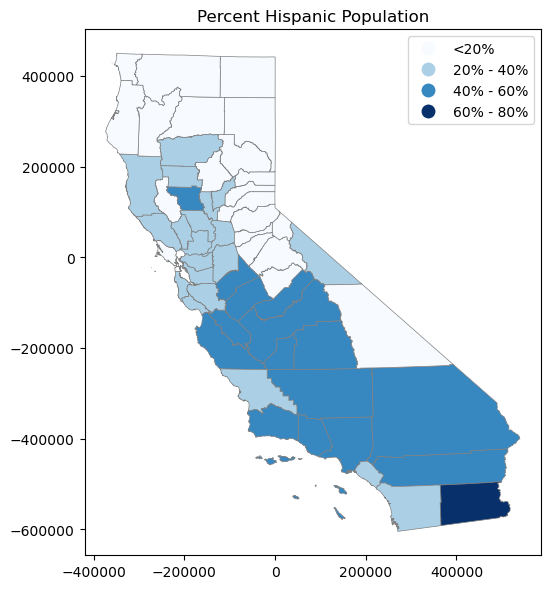

In [19]:
fig, ax = plt.subplots(figsize=(15, 6)) 
# Plot percent Hispanic as choropleth
counties.plot(column=(100 * counties['HISPANIC'] / counties['POP2012']), 
              legend=True, 
              cmap="Blues", 
              scheme='user_defined', 
              classification_kwds={'bins': [20, 40, 60, 80]},
              edgecolor="grey",
              linewidth=0.5,
              ax=ax)

legend_labels_list = ['<20%',
                      '20% - 40%',
                      '40% - 60%',
                      '60% - 80%',
                      '80% - 100%']

# Apply the labels to the plot
for idx, label in enumerate(ax.get_legend().get_texts()):
    label.set_text(legend_labels_list[idx])

ax.set_title("Percent Hispanic Population")
plt.tight_layout()

---

### Challenge 2: Reflecting on Chloropleth Maps

1. What new options and operations have we added to our code?
    
    **<span style="color:red">
    ANSWER:</span>**
    Added grey edge color and 0.5 line width


2. Based on our code, what title would you give this plot to describe what it displays?
    
    **<span style="color:red">
    ANSWER:</span>**
    Southern California has a higher percent Hispanic population than northern California
    

3. How many bins do we specify in the `legend_labels_list` object, and how many bins are in the map legend? Why?
    
    **<span style="color:red">
    ANSWER:</span>**
    5, but only 4 are in the legend; no counties have > 80% Hispanic population  

---

## Point Maps

Choropleth maps are great, but mapping using point symbols enables us to visualize our spatial data in another way. 

If you know both mapping methods you can expand how much information you can show in one map. 

For example, point maps are a great way to map `counts` because the varying sizes of areas are deemphasized.

Let's read in some point data on Alameda County schools.

In [20]:
schools_df = pd.read_csv('../data/alco_schools.csv')
schools_df.head()

,X,Y,Site,Address,City,State,Type,API,Org
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public


We got it from a plain CSV file, so let's convert it to a GeoDataFrame.

In [21]:
schools_gdf = gpd.GeoDataFrame(schools_df, 
                               geometry=gpd.points_from_xy(schools_df.X, schools_df.Y))
schools_gdf.crs = "epsg:4326"

Now, we can map it.

Text(0.5, 1.0, 'Alameda County Schools')

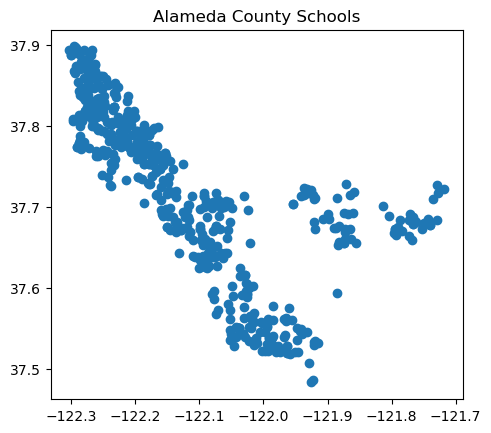

In [22]:
schools_gdf.plot()
plt.title('Alameda County Schools')

### Proportional Color Maps

**Proportional color maps** linearly scale the `color` of a point symbol by the data values.

Let's try this by creating a map of `API`. API stands for *Academic Performance Index*, which is a measurement system that looks at the performance of an individual school.

Text(0.5, 1.0, 'Alameda County, School API scores')

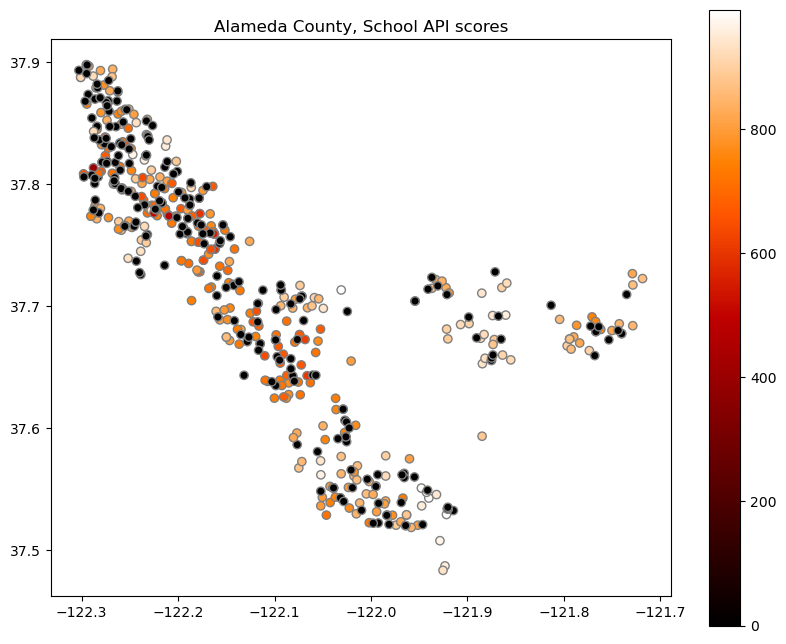

In [23]:
schools_gdf.plot(column="API",
                 cmap="gist_heat", 
                 edgecolor="grey",
                 figsize=(10, 8),
                 legend=True)
plt.title("Alameda County, School API scores")

When you see that continuous color bar in the legend, you know that the mapping of data values to colors is not classified.

### Graduated Color Maps

We can also create **graduated color maps** by binning data values before associating them with colors. These are just like choropleth maps, except that the term "choropleth" is only used with polygon data. 

Graduated color maps use the same syntax as the choropleth maps above: you create them by setting a value for `scheme`. 

Below, we copy the code we used above to create a choropleth, but we change the name of the GeoDataFrame to use the point geometry.

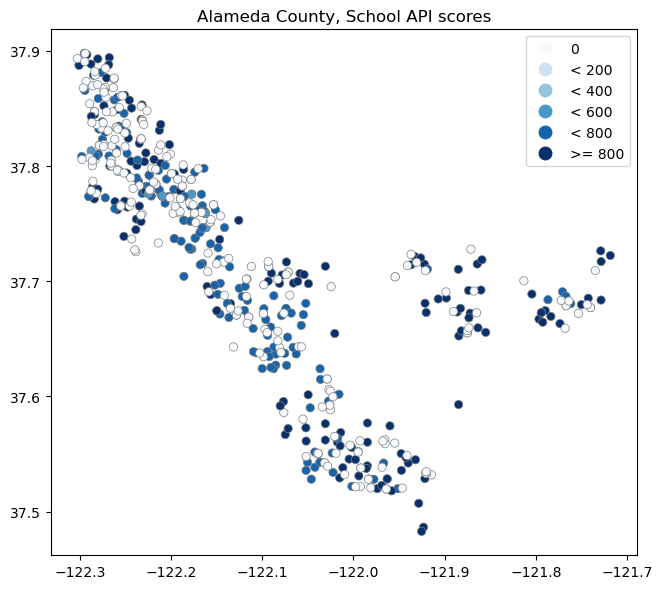

In [24]:
fig, ax = plt.subplots(figsize = (15, 6)) 

# Plot percent non-white with graduated colors
schools_gdf.plot(column='API', 
                 legend=True, 
                 cmap="Blues",
                 scheme='user_defined', 
                 classification_kwds={'bins':[0, 200, 400, 600, 800]},
                 edgecolor="grey",
                 #markersize=60,
                 linewidth=0.5,
                 ax=ax)

# Create a custom legend
legend_labels_list = ['0',
                      '< 200',
                      '< 400',
                      '< 600',
                      '< 800',
                      '>= 800']

# Apply the labels to the plot
for idx, label in enumerate(ax.get_legend().get_texts()):
    label.set_text(legend_labels_list[idx])

ax.set_title("Alameda County, School API scores")
plt.tight_layout()

In [25]:
schools_gdf['API'].describe()

count    550.000000
mean     462.320000
std      393.942535
min        0.000000
25%        0.000000
50%      670.500000
75%      807.750000
max      993.000000
Name: API, dtype: float64

As you can see, the syntax for a choropleth and graduated color map is the same,
although some options only apply to one or the other.

For example, uncomment the `markersize` parameter above to see how you can further customize a graduated color map.

### Graduated Symbol Maps

`Graduated symbol maps` are also a great method for mapping points.  These are just like graduated color maps, but instead of associating symbol color with data values, they associate point size. Similarly, graduated symbol maps use `classification schemes` to set the size of point symbols. 

> We demonstrate how to make graduated symbol maps along with some other mapping techniques in the `Optional Mapping notebook` which we encourage you to explore on your own. (***Coming Soon***)

## Mapping Categorical Data

Mapping categorical data, also called qualitative data, is a bit more straightforward. There is no need to scale or classify data values. The goal of the color map is to provide a contrasting set of colors so as to clearly delineate different categories. Here's a point-based example:

<Axes: >

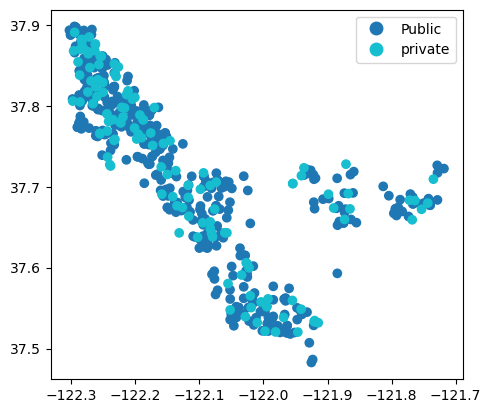

In [26]:
schools_gdf.plot(column='Org', categorical=True, legend=True)

---

### Challenge 3: Data-Driven Mapping

Point and polygons are not the only geometry-types that we can use in data-driven mapping!

Run the next cell to load a dataset containing Berkeley's bicycle boulevards (which we'll be using more in the following notebook).

Then, in the following cell, write your own code to:

1. Plot the bike boulevards;
2. Color them by status (find the correct column in the head of the dataframe, displayed below);
3. Color them using a fitting, good-looking qualitative colormap that you choose from [The Matplotlib Colormap Reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html);
4. Set the line width to 5 (check the plot method's documentation to find the right argument for this!);
4. Add the argument `figsize=(15, 15)`, to make your map nice and big and visible!
    
Using this map, answer the following questions:

1. What does that map indicate about the status of the Berkeley bike boulevards?
2. What does that map indicate about the status of your Berkeley bike-boulevard *dataset*?

---

In [27]:
bike_blvds = gpd.read_file('../data/transportation/BerkeleyBikeBlvds.geojson')
bike_blvds.head()

,BB_STRNAM,BB_STRID,BB_FRO,BB_TO,BB_SECID,DIR_,Status,ALT_bikeCA,Shape_len,len_km,geometry
0,Heinz/Russell,RUS,7th,8th,RUS01,E/W,Existing,No,101.128166,0.101,"MULTILINESTRING ((562293.786 4189795.092, 5623..."
1,Heinz/Russell,RUS,8th,9th,RUS02,E/W,Ezisting,No,100.814072,0.101,"MULTILINESTRING ((562391.553 4189820.949, 5624..."
2,Heinz/Russell,RUS,9th,10th,RUS03,E/W,Existing,No,100.037396,0.100,"MULTILINESTRING ((562489.017 4189846.721, 5625..."
3,Heinz/Russell,RUS,10th,San Pablo,RUS04,E/W,Existing,No,106.592878,0.107,"MULTILINESTRING ((562585.723 4189872.321, 5626..."
4,San Pablo,RUS,Heinz,Russell,RUS05,N/S,Existing,No,89.563478,0.090,"MULTILINESTRING ((562688.854 4189899.267, 5627..."


<Axes: >

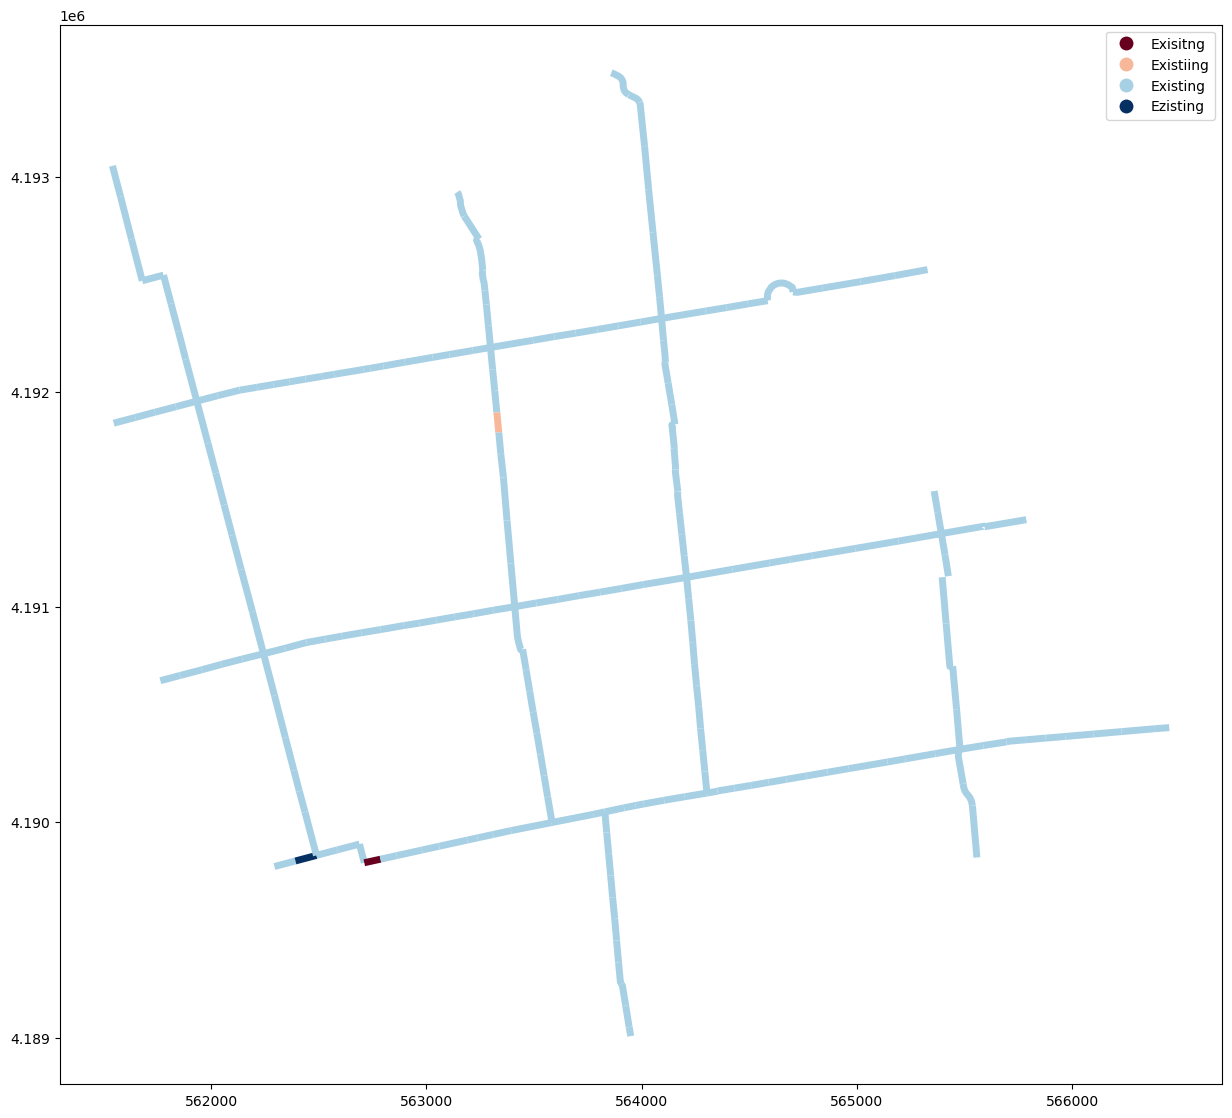

In [37]:
# YOUR CODE HERE

bike_blvds.plot(column='Status',
                cmap='RdBu',
                linewidth=5,
                legend=True,
                figsize=(15, 15))


Using this map, answer the following questions:

1. What does that map indicate about the status of the Berkeley bike boulevards?

    **<span style="color:red">
    ANSWER:</span>**
    All Berkeley bike boulevards exist.


2. What does that map indicate about the status of your Berkeley bike-boulevard dataset?

    **<span style="color:red">
    ANSWER:</span>**
    It has typos: "existing" is mispelled in three different ways.



